In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os
%matplotlib inline

In [10]:
#Read the data
LifeExp = pd.read_csv('Life Expectancy Data.csv', sep=',') 
#Clean Data
LifeExp = LifeExp.rename(columns={'Life expectancy ': 'Life_Expectancy', ' BMI ':'BMI'})
LifeExp.head()

,Country,Year,Status,Life_Expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
LifeExp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_Expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [12]:
LifeExp = LifeExp[LifeExp['BMI'].notna()]

In [18]:
LifeExp.dropna(subset=['BMI'], how='all', inplace=True)

In [21]:
LifeExp.dropna(subset=['Alcohol'], how='all', inplace=True)

In [22]:
LifeExp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2727 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2727 non-null   object 
 1   Year                             2727 non-null   int64  
 2   Status                           2727 non-null   object 
 3   Life_Expectancy                  2720 non-null   float64
 4   Adult Mortality                  2720 non-null   float64
 5   infant deaths                    2727 non-null   int64  
 6   Alcohol                          2727 non-null   float64
 7   percentage expenditure           2727 non-null   float64
 8   Hepatitis B                      2202 non-null   float64
 9   Measles                          2727 non-null   int64  
 10  BMI                              2727 non-null   float64
 11  under-five deaths                2727 non-null   int64  
 12  Polio               

In [25]:
#bmi (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population
LifeExp['BMI'].describe()

count    2727.000000
mean       38.031903
std        19.960934
min         1.000000
25%        19.000000
50%        43.100000
75%        55.900000
max        87.300000
Name: BMI, dtype: float64

In [26]:
#alcohol (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita
LifeExp['Alcohol'].describe()

count    2727.000000
mean        4.623528
std         4.055997
min         0.010000
25%         0.880000
50%         3.790000
75%         7.745000
max        17.870000
Name: Alcohol, dtype: float64

In [69]:
avg_life = [LifeExp[LifeExp['Year']==year]['Life_Expectancy'].mean() for year in LifeExp.Year.value_counts().keys()]

d:\Users\pafj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Users\pafj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Trend for Life Expectency wrt Year')

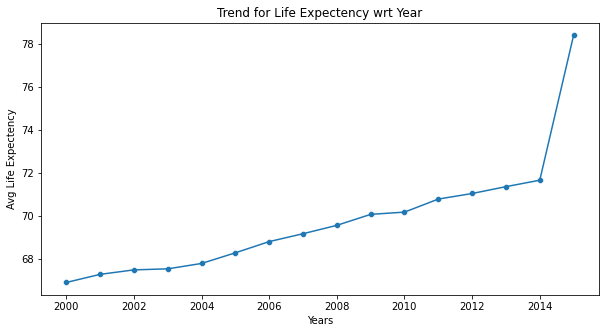

In [70]:
fig = plt.figure(figsize=(10,5))
sns.scatterplot(list(LifeExp.Year.value_counts().keys()),avg_life)
sns.lineplot(list(LifeExp.Year.value_counts().keys()),avg_life)
plt.ylabel('Avg Life Expectency')
plt.xlabel('Years')
plt.title('Trend for Life Expectency wrt Year')

In [71]:
avg_bmi = [LifeExp[LifeExp['Year']==year]['BMI'].mean() for year in LifeExp.Year.value_counts().keys()]

d:\Users\pafj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Users\pafj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Trend for BMI wrt Year')

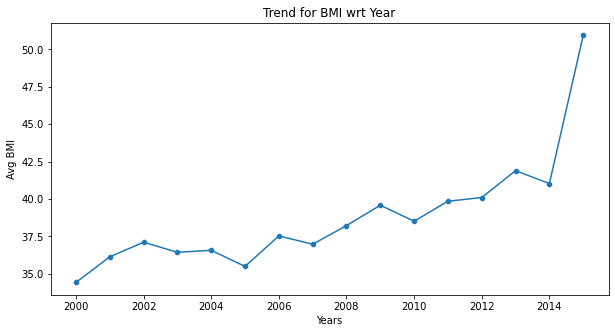

In [74]:
fig = plt.figure(figsize=(10,5))
sns.scatterplot(list(LifeExp.Year.value_counts().keys()),avg_bmi)
sns.lineplot(list(LifeExp.Year.value_counts().keys()),avg_bmi)
plt.ylabel('Avg BMI')
plt.xlabel('Years')
plt.title('Trend for BMI wrt Year')

In [73]:
avg_alcohol = [LifeExp[LifeExp['Year']==year]['Alcohol'].mean() for year in LifeExp.Year.value_counts().keys()]

d:\Users\pafj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Users\pafj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Trend for Alcohol wrt Year')

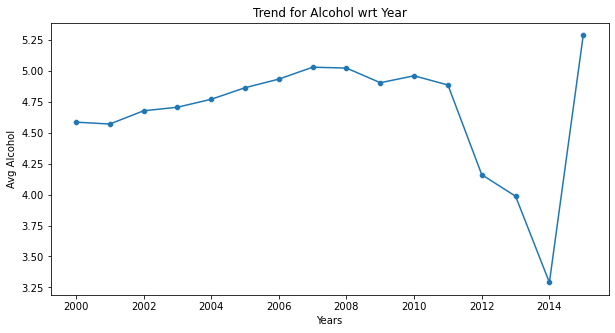

In [75]:
fig = plt.figure(figsize=(10,5))
sns.scatterplot(list(LifeExp.Year.value_counts().keys()),avg_alcohol)
sns.lineplot(list(LifeExp.Year.value_counts().keys()),avg_alcohol)
plt.ylabel('Avg Alcohol')
plt.xlabel('Years')
plt.title('Trend for Alcohol wrt Year')

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(data=data,x='Year',y='Adult Mortality',label = 'Adult Mortality')
sns.lineplot(data=data,x='Year',y='infant deaths',label = 'Infant Deaths')
sns.lineplot(data=data,x='Year',y='Life expectancy ',label = 'Life expectancy ')
plt.legend()

In [38]:
LifeExp['Country'].nunique()

188

In [56]:
#picking 2013 only since Alcohol values in 2015 are mostly null values
LifeExp2013 = LifeExp[LifeExp['Year'] == 2013]

In [59]:
LifeExp2013['BMI'].describe()

count    188.000000
mean      41.892553
std       21.461689
min        2.100000
25%       23.175000
50%       48.150000
75%       59.325000
max       87.300000
Name: BMI, dtype: float64

In [65]:
LifeExp2013['Alcohol'].describe()

count    188.000000
mean       3.986915
std        4.182009
min        0.010000
25%        0.010000
50%        2.490000
75%        7.552500
max       15.040000
Name: Alcohol, dtype: float64

In [58]:
LifeExp2013.groupby(['BMI'])['Life_Expectancy'].mean()

BMI
2.1     65.05
2.6     58.80
2.7     62.60
3.8     69.85
3.9     75.60
        ...  
77.3      NaN
79.3      NaN
81.6      NaN
82.8      NaN
87.3      NaN
Name: Life_Expectancy, Length: 151, dtype: float64

In [64]:
LifeExp2013.groupby(['Status'])['BMI','Alcohol'].agg(['count','max', 'mean', 'median'])

<ipython-input-64-73994fbc4360>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  LifeExp2013.groupby(['Status'])['BMI','Alcohol'].agg(['count','max', 'mean', 'median'])


BMI                         Alcohol                        
           count   max       mean median   count    max      mean median
Status                                                                  
Developed     32  68.8  49.690625   60.1      32  15.04  9.699688   9.80
Developing   156  87.3  40.292949   44.0     156  14.66  2.815064   0.95

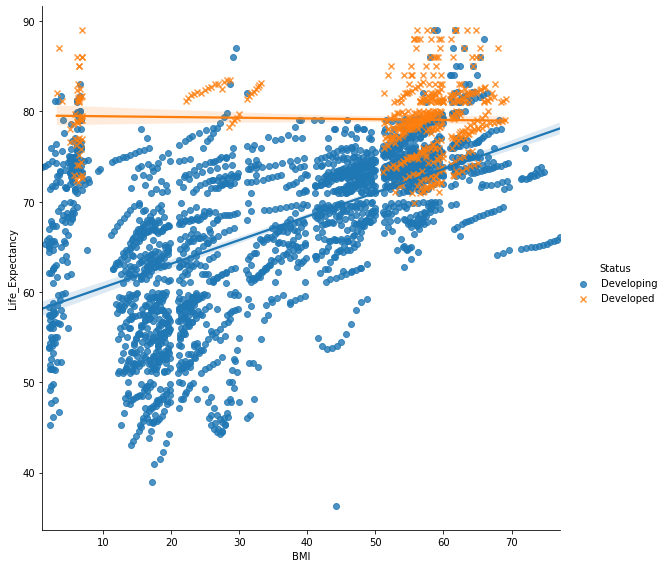

In [31]:
sns.pairplot(LifeExp, x_vars=["BMI"], y_vars=["Life_Expectancy"],
             hue="Status",markers=["o", "x"], height=8, kind="reg")

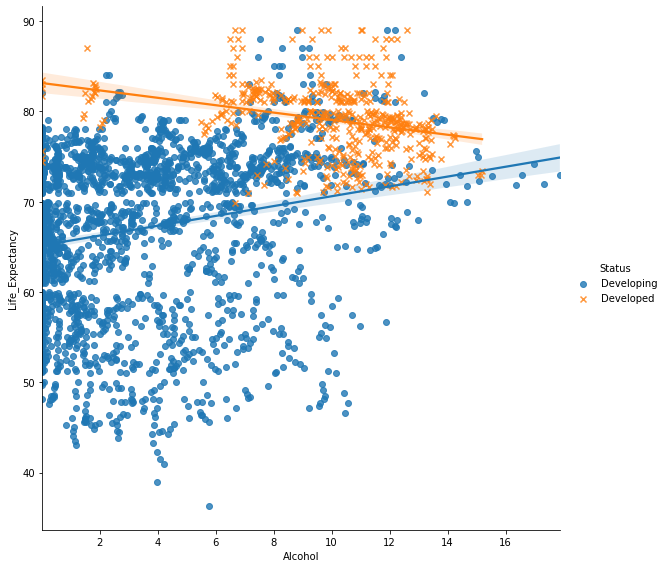

In [30]:
sns.pairplot(LifeExp, x_vars=["Alcohol"], y_vars=["Life_Expectancy"],
             hue="Status",markers=["o", "x"], height=8, kind="reg")

I’m guessing that this is due to the fact that only wealthier countries can afford alcohol or the consumption of alcohol is more prevalent among wealthier populations.

That is why developing countries and alcohol have positive relation and developed countries and alcohol have negative relation.